In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
data = './mail_data.csv'
df = pd.read_csv(data)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#Repllace null values with null string
mail_data = df.where((pd.notnull(df)),'')

In [6]:
#Label spam as 0 and ham as 1
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [7]:
#Seperate the data as text and labels
X = mail_data['Message']
Y = mail_data['Category']

In [8]:
# Ensure Y is a Pandas Series of integers
Y = pd.Series(Y).astype(int)

In [9]:
# Print the shapes of X and Y
print(f"Shape of X:{X.shape}" )
print(f"Shape of Y:{Y.shape}" )

Shape of X:(5572,)
Shape of Y:(5572,)


In [10]:
# Split into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [11]:
# Vectorize the text data
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

In [12]:
# Train models
models = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost ' : AdaBoostClassifier(),
    'Naive Bayes' : MultinomialNB()
}

trained_models = {}
accuracies = {}
precisions = {}
recalls = {}
f1_scores = {}

In [13]:
# Train each model and evaluate
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_features, Y_train)
    predictions = model.predict(X_test_features)
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test,predictions)
    recall = recall_score(Y_test,predictions)
    f1score = f1_score(Y_test,predictions)
    accuracies[model_name] = accuracy
    precisions[model_name] = precision
    recalls [model_name] = recall
    f1_scores[model_name] = f1score
    trained_models[model_name] = model
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"{model_name} Precision: {precision:.2f}")
    print(f"{model_name} Recall: {recall:.2f}")
    print(f"{model_name} F1_score: {f1score:.2f}")

Training SVM...
SVM Accuracy: 0.98
SVM Precision: 0.98
SVM Recall: 1.00
SVM F1_score: 0.99
Training Decision Tree...
Decision Tree Accuracy: 0.97
Decision Tree Precision: 0.97
Decision Tree Recall: 1.00
Decision Tree F1_score: 0.98
Training Random Forest...
Random Forest Accuracy: 0.98
Random Forest Precision: 0.97
Random Forest Recall: 1.00
Random Forest F1_score: 0.99
Training AdaBoost ...


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost  Accuracy: 0.97
AdaBoost  Precision: 0.97
AdaBoost  Recall: 1.00
AdaBoost  F1_score: 0.98
Training Naive Bayes...
Naive Bayes Accuracy: 0.97
Naive Bayes Precision: 0.97
Naive Bayes Recall: 1.00
Naive Bayes F1_score: 0.98


In [14]:
# Plot accuracy comparison
def plot_accuracies(accuracies):
    """
    Plots a bar chart comparing the accuracies of different models.
    
    Parameters:
    accuracies (dict): Dictionary of model names and their accuracies.
    """
    model_names = list(accuracies.keys())
    accuracy_values = list(accuracies.values())

    plt.figure(figsize=(8, 6))
    plt.bar(model_names, accuracy_values, color=['blue', 'green', 'orange'])
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
    for i, acc in enumerate(accuracy_values):
        plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=10)
    plt.show()


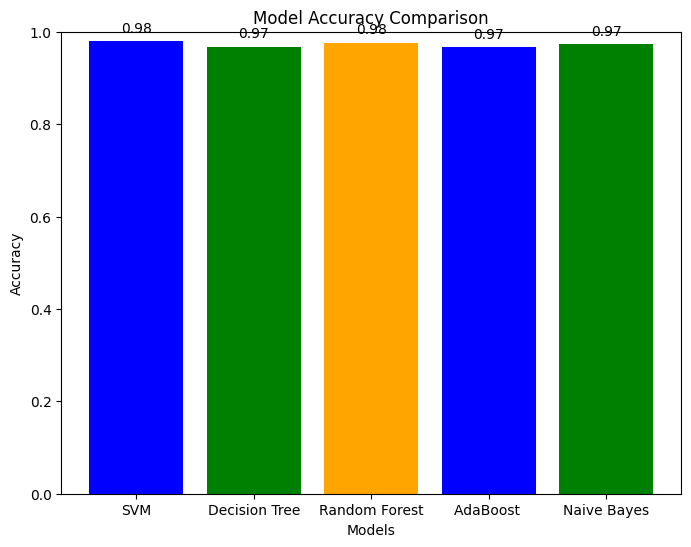

In [15]:
# Call the function to plot accuracies
plot_accuracies(accuracies)

In [16]:
# Function to classify using all models
def classify_with_all_models(input_message, trained_models, vectorizer):
    """
    Classify the input message as Spam or Ham using all trained models.
    
    Parameters:
    input_message (str): The message to classify.
    trained_models (dict): Dictionary of trained models.
    vectorizer (TfidfVectorizer): Fitted vectorizer used for preprocessing.

    Returns:
    dict: A dictionary containing predictions from each model.
    """
    input_features = vectorizer.transform([input_message])
    results = {}
    for model_name, model in trained_models.items():
        prediction = model.predict(input_features)[0]
        results[model_name] = "Spam" if prediction == 0 else "Ham"
    return results

In [20]:
# Interactive input classification
user_input_message = "Congratulations! You've won a $1,000 gift card. Click the link to claim your prize: www.fakeprizes.com"
 

In [21]:
# Classify using all models
classification_results = classify_with_all_models(user_input_message, trained_models, vectorizer)

In [22]:
# Display results
print("\n--- Classification Results ---")
for model_name, result in classification_results.items():
    print(f"{model_name}: {result}")


--- Classification Results ---
SVM: Spam
Decision Tree: Spam
Random Forest: Spam
AdaBoost : Spam
Naive Bayes: Spam
